In [301]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

file = pd.read_csv("cereal.csv")
cereals = pd.DataFrame(file)
cereals



,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70.0,4,1,130,10.0,5.0,6.0,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120.0,3,5,15,2.0,8.0,8.0,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70.0,4,1,260,9.0,7.0,5.0,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50.0,4,0,140,14.0,8.0,0.0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110.0,2,2,200,1.0,14.0,8.0,-1,25,3,1.0,0.75,34.384843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110.0,2,1,250,0.0,21.0,3.0,60,25,3,1.0,0.75,39.106174
73,Trix,G,C,110.0,1,1,140,0.0,13.0,12.0,25,25,2,1.0,1.00,27.753301
74,Wheat Chex,R,C,100.0,3,1,230,3.0,17.0,3.0,115,25,1,1.0,0.67,49.787445
75,Wheaties,G,C,100.0,3,1,200,3.0,17.0,3.0,110,25,1,1.0,1.00,51.592193


Your challenge is to plot the calories of each cereal against their sugar content.

You will notice there are missing values. Choose the most appropriate method to filling, or removing those values so as not to skew your results.

We will use this cleaned data for visualising in the next Chapter!

In [302]:
#Find out the missing values
cereals.isnull().values.any()
#Where are the missing values
for column in cereals:
    print(f"Missing column: {column}")
    print(f"Is missing values: {cereals[column].isnull().any()} \n")

Missing column: name
Is missing values: False 

Missing column: mfr
Is missing values: False 

Missing column: type
Is missing values: False 

Missing column: calories
Is missing values: True 

Missing column: protein
Is missing values: False 

Missing column: fat
Is missing values: False 

Missing column: sodium
Is missing values: False 

Missing column: fiber
Is missing values: False 

Missing column: carbo
Is missing values: False 

Missing column: sugars
Is missing values: True 

Missing column: potass
Is missing values: False 

Missing column: vitamins
Is missing values: False 

Missing column: shelf
Is missing values: False 

Missing column: weight
Is missing values: False 

Missing column: cups
Is missing values: False 

Missing column: rating
Is missing values: False 



In [303]:
#If there are only a few with missing values it will be sensible to drop these values. 
#If not, then find another method to fill these.

cereals_missing_calories = cereals[['name', 'calories', 'sugars']].loc[cereals['calories'].isnull()]
cereals_missing_sugars = cereals[['name', 'calories', 'sugars']].loc[cereals['sugars'].isnull()]
print(cereals_missing_calories)
print(cereals_missing_sugars)
    

                  name  calories  sugars
11            Cheerios       NaN     1.0
16         Corn Flakes       NaN     2.0
36  Honey Nut Cheerios       NaN    10.0
67           Special K       NaN     3.0
                       name  calories  sugars
5   Apple Cinnamon Cheerios     110.0     NaN
17                Corn Pops     110.0     NaN
35         Honey Graham Ohs     120.0     NaN
52    Post Nat. Raisin Bran     120.0     NaN
76      Wheaties Honey Gold     110.0     NaN


Looking at the above, I think the most sensible way to fill the values is by calculating the mean.
So for Cheerios, to fill in the calories I would calculate the mean calories for all cereals with 1.0 sugar content. Then same for Cornflakes, honey nut, etc. For each one I will calculate the mean calores for cereals that have its corresponding sugar content.

I will follow the same method for the cereals missing sugars. So for the cereals with 120 calories, I will calculate the mean sugar content for cereals with 120 calories, and for 110 calories I will calculate accordingly.

In [304]:
#Lets fill Cheerios with a random value, as I can't do a mean.

for sugars in cereals['sugars']:
    if sugars == 1.0:
        average_calories_1 = 110

    elif sugars == 2.0:
        average_calories_2 = cereals.loc[cereals['sugars'] == 2.0, 'calories'].mean()
        
    elif sugars == 10.0:
        average_calories_10 = cereals.loc[cereals['sugars'] == 10.0, 'calories'].mean()
    
    elif sugars == 3.0:
        average_calories_3 = cereals.loc[cereals['sugars'] == 3.0, 'calories'].mean()

print(average_calories_1)
print(average_calories_2)
print(average_calories_10)
print(average_calories_3)

cereals.loc[(cereals['sugars'] == 1.0) & (cereals['calories'].isnull()), 'calories'] = average_calories_1
cereals.loc[(cereals['sugars'] == 2.0) & (cereals['calories'].isnull()), 'calories'] = average_calories_2
cereals.loc[(cereals['sugars'] == 10.0) & (cereals['calories'].isnull()), 'calories'] = average_calories_10
cereals.loc[(cereals['sugars'] == 3.0) & (cereals['calories'].isnull()), 'calories'] = average_calories_3


110
100.0
116.66666666666667
105.83333333333333


In [305]:
for calories in cereals['calories']:
    if calories == 110:
        average_sugars_110 = cereals.loc[cereals['calories'] == 110, 'sugars'].mean()

    elif calories == 120:
        average_sugars_120 = cereals.loc[cereals['calories'] == 120, 'sugars'].mean()

print(average_sugars_110)
print(average_sugars_120)

cereals.loc[(cereals['calories'] == 110) & (cereals['sugars'].isnull()), 'sugars'] = average_sugars_110
cereals.loc[(cereals['calories'] == 120) & (cereals['sugars'].isnull()), 'sugars'] = average_sugars_120


7.791666666666667
9.5


In [306]:
cereals.iloc[0:35]

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70.0,4,1,130,10.0,5.0,6.000000,280,25,3,1.00,0.33,68.402973
1,100% Natural Bran,Q,C,120.0,3,5,15,2.0,8.0,8.000000,135,0,3,1.00,1.00,33.983679
2,All-Bran,K,C,70.0,4,1,260,9.0,7.0,5.000000,320,25,3,1.00,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50.0,4,0,140,14.0,8.0,0.000000,330,25,3,1.00,0.50,93.704912
4,Almond Delight,R,C,110.0,2,2,200,1.0,14.0,8.000000,-1,25,3,1.00,0.75,34.384843
5,Apple Cinnamon Cheerios,G,C,110.0,2,2,180,1.5,10.5,7.791667,70,25,1,1.00,0.75,29.509541
6,Apple Jacks,K,C,110.0,2,0,125,1.0,11.0,14.000000,30,25,2,1.00,1.00,33.174094
7,Basic 4,G,C,130.0,3,2,210,2.0,18.0,8.000000,100,25,3,1.33,0.75,37.038562
8,Bran Chex,R,C,90.0,2,1,200,4.0,15.0,6.000000,125,25,1,1.00,0.67,49.120253
9,Bran Flakes,P,C,90.0,3,0,210,5.0,13.0,5.000000,190,25,3,1.00,0.67,53.313813


In [307]:
cereals.iloc[35:77]

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
35,Honey Graham Ohs,Q,C,120.000000,1,2,220,1.0,12.0,9.500000,45,25,2,1.00,1.00,21.871292
36,Honey Nut Cheerios,G,C,116.666667,3,1,250,1.5,11.5,10.000000,90,25,1,1.00,0.75,31.072217
37,Honey-comb,P,C,110.000000,1,0,180,0.0,14.0,11.000000,35,25,1,1.00,1.33,28.742414
38,Just Right Crunchy Nuggets,K,C,110.000000,2,1,170,1.0,17.0,6.000000,60,100,3,1.00,1.00,36.523683
39,Just Right Fruit & Nut,K,C,140.000000,3,1,170,2.0,20.0,9.000000,95,100,3,1.30,0.75,36.471512
40,Kix,G,C,110.000000,2,1,260,0.0,21.0,3.000000,40,25,2,1.00,1.50,39.241114
41,Life,Q,C,100.000000,4,2,150,2.0,12.0,6.000000,95,25,2,1.00,0.67,45.328074
42,Lucky Charms,G,C,110.000000,2,1,180,0.0,12.0,12.000000,55,25,2,1.00,1.00,26.734515
43,Maypo,A,H,100.000000,4,1,0,0.0,16.0,3.000000,95,25,2,1.00,1.00,54.850917
44,Muesli Raisins; Dates; & Almonds,R,C,150.000000,4,3,95,3.0,16.0,11.000000,170,25,3,1.00,1.00,37.136863


# Now that I have filled in the missing values, the challenge is to plot the calories of each cereal against their sugar content.

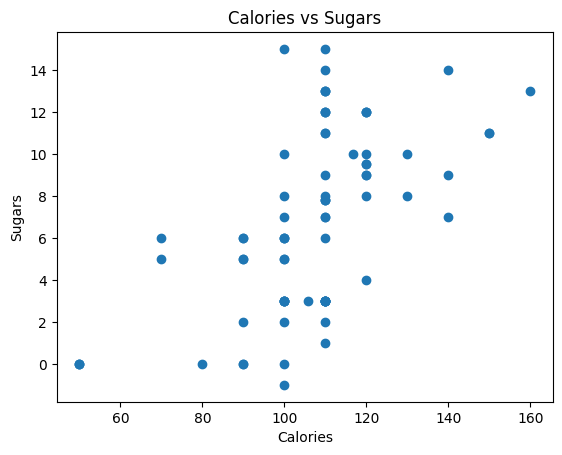

In [308]:
plt.scatter(cereals['calories'], cereals['sugars'])
plt.xlabel('Calories')
plt.ylabel('Sugars')
plt.title("Calories vs Sugars")
plt.show()

In [309]:
sugar_vs_calorie_corr = cereals['sugars'].corr(cereals['calories'])
print(f"The correlation between sugar and calories is: {sugar_vs_calorie_corr}")

The correlation between sugar and calories is: 0.5694314613569905


The question is, does the sugar content influence the calorie count? 

Looking at the above visualisation it is clear there is a positive correlation. This indicates that as the sugar content increases so the the calorie count and vice versa.

# Which are the top 4 cereals for vitamin content?Visualise your conclusion.

In [310]:
group_by = cereals[['name', 'mfr', 'vitamins']]
vitamin_content_rank = group_by.sort_values(by='vitamins', ascending=False).iloc[0:4]
vitamin_content_rank.index = range(1, len(vitamin_content_rank) + 1)
vitamin_content_rank

,name,mfr,vitamins
1,Just Right Crunchy Nuggets,K,100
2,Total Whole Grain,G,100
3,Total Corn Flakes,G,100
4,Total Raisin Bran,G,100


To visualise the top 4 cereals with vitamin content in the DataFrame, I have taken the following steps:
1. I grouped the cereals by name, manufacturer and vitamins.
2. I created a variable that stores the filtered DataFrame and sorts the values by vitamins in descending order, then filtered this further to only see the first 4.
3. In order to have my table ordered from 1 to 4, I indexed my filtered DataFrame and used this code 'range(1, len(vitamin_content_rank) + 1)'. This generates a range of numbers ordered from 1 to the length of my results. By adding 1 we stop the value of the range, we ensure that the range includes the upper bound.

([0, 1, 2, 3],
 [Text(0, 0, 'Just Right Crunchy  Nuggets'),
  Text(1, 0, 'Total Whole Grain'),
  Text(2, 0, 'Total Corn Flakes'),
  Text(3, 0, 'Total Raisin Bran')])

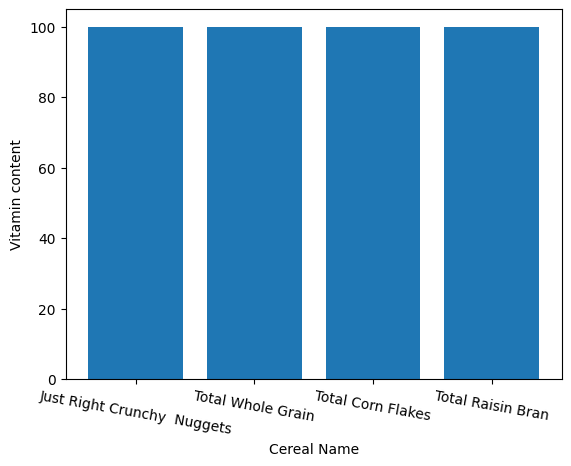

In [311]:
x = vitamin_content_rank['name']
y = vitamin_content_rank['vitamins']
plt.bar(x, y)
plt.xlabel("Cereal Name")
plt.ylabel("Vitamin content")
plt.xticks(rotation=-10)

As you can see, I've used a bar graph to show the top 4 cereals with vitamin content. Although I'm not sure how helpful this is given that they all have the same value.

# Which are the top 4 cereals for protein? Visualise your conclusion.

In [312]:
group_by = cereals[['name', 'mfr', 'protein']]
vitamin_content_rank = group_by.sort_values(by='protein', ascending=False).iloc[0:4]
vitamin_content_rank.index = range(1, len(vitamin_content_rank) + 1)
vitamin_content_rank

,name,mfr,protein
1,Cheerios,G,6
2,Special K,K,6
3,Quaker Oatmeal,Q,5
4,100% Bran,N,4


Here I have used the same code as I did when visualising the vitamin content, except this is sorted by protein.
The numbers here are varied so I believe the easiest chart to visualise this would be a bar chart. See below:

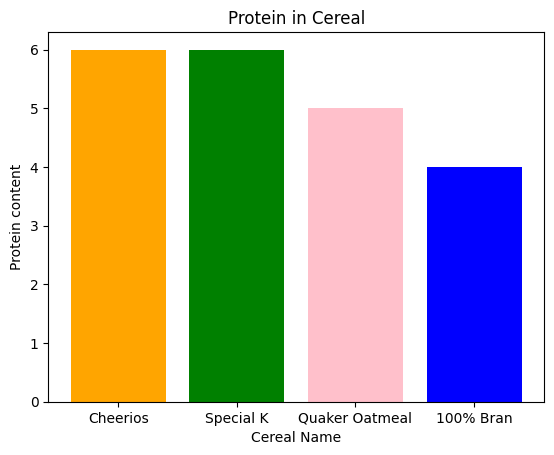

In [313]:
x = vitamin_content_rank['name']
y = vitamin_content_rank['protein']
colors = ['orange', 'green', 'pink', 'blue']

plt.bar(x, y, color=colors) #added colors so each bar is filled by a specific color
plt.xlabel("Cereal Name")
plt.ylabel("Protein content")
plt.title("Protein in Cereal")
plt.show()

# Does Sodium content positively or negatively affect overall ranking? Visualise your conclusion.

In [314]:
cereals.columns
group_by_sodium = cereals[['name', 'mfr', 'sodium', 'rating']]
sodium_vs_rating = group_by_sodium.sort_values(by='sodium', ascending=False)
sodium_vs_rating.index = range(1, len(sodium_vs_rating) + 1)
sodium_vs_rating


,name,mfr,sodium,rating
1,Product 19,K,320,41.503540
2,Rice Krispies,K,290,40.560159
3,Cheerios,G,290,50.764999
4,Corn Flakes,K,290,45.863324
5,Corn Chex,R,280,41.445019
...,...,...,...,...
73,Frosted Mini-Wheats,K,0,58.345141
74,Raisin Squares,K,0,55.333142
75,Maypo,A,0,54.850917
76,Quaker Oatmeal,Q,0,50.828392


As you can see above, I have filtered the DataFrame and sorted by sodium content. The top five cereals with the highest sodium content have lower ratings than the bottom five with the lowest sodium content.

Below I'm going to plot the sodium content and rating on the same chart to show if sodium positively or negatively affects rating.

Text(0, 0.5, 'Rating')

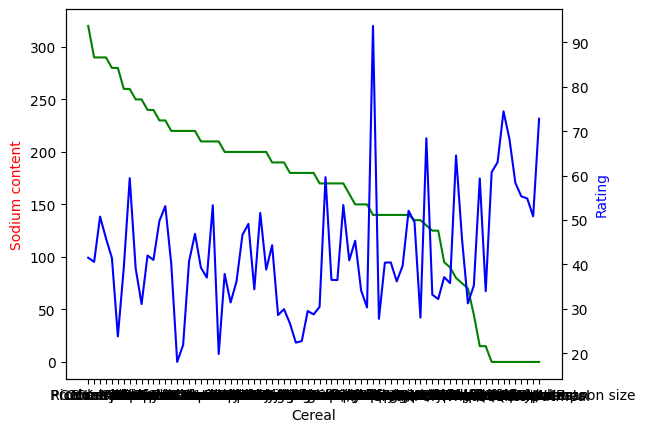

In [315]:
x = sodium_vs_rating['name']
y1 = sodium_vs_rating['sodium']
y2 = sodium_vs_rating['rating']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(x, y1, 'g-')
ax2.plot(x, y2, 'b-')

ax1.set_xlabel('Cereal')
ax1.set_ylabel('Sodium content', color='r')
ax2.set_ylabel('Rating', color='b')


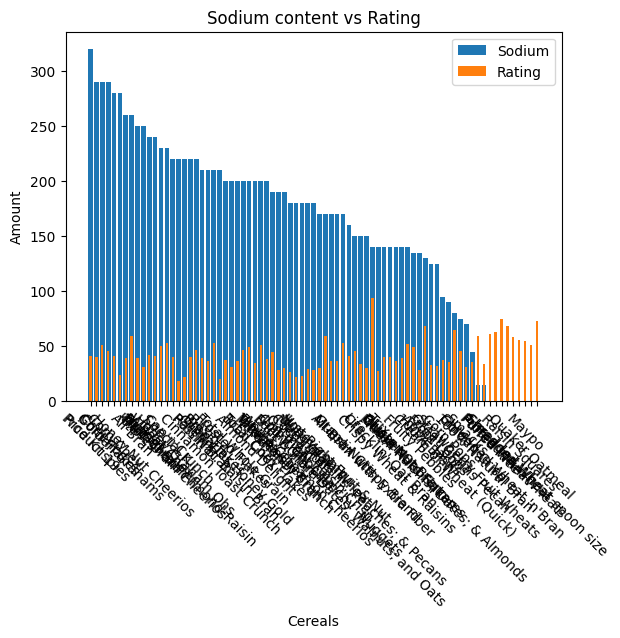

In [316]:
plt.bar(x, y1, label="Sodium")
plt.bar(x, y2, width=0.4, label="Rating")

plt.xlabel("Cereals")
plt.ylabel("Amount")
plt.xticks(rotation=-45)

plt.title("Sodium content vs Rating")
plt.legend(loc="upper right" )
plt.show()

Out of the two graphs I've plotted, the second one is better visually as I can see them against each other. Based on my finding it seems that the rating fluctuates so it is difficult to tell whether lower sodium content means increased ratings. Though if you look closely you can see that the ratings do increase a little towards the lower end of the sodium content.

The names of the cereals all being muddle together makes it look terrible. So below I'll make a graph that only looks at the top 15 and another graph that looks at the bottom 15.

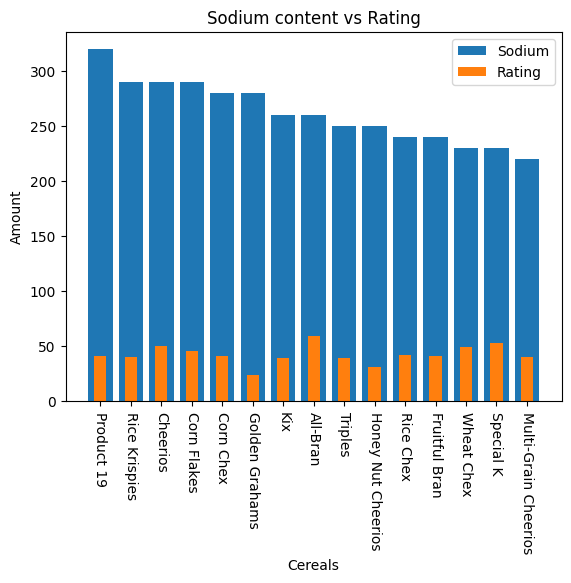

In [317]:
x = sodium_vs_rating['name'].iloc[0:15]
y1 = sodium_vs_rating['sodium'].iloc[0:15]
y2 = sodium_vs_rating['rating'].iloc[0:15]

plt.bar(x, y1, label="Sodium")
plt.bar(x, y2, width=0.4, label="Rating")

plt.xlabel("Cereals")
plt.ylabel("Amount")
plt.xticks(rotation=-90)

plt.title("Sodium content vs Rating")
plt.legend(loc="upper right" )
plt.show()

Now one that looks at the bottom 15.

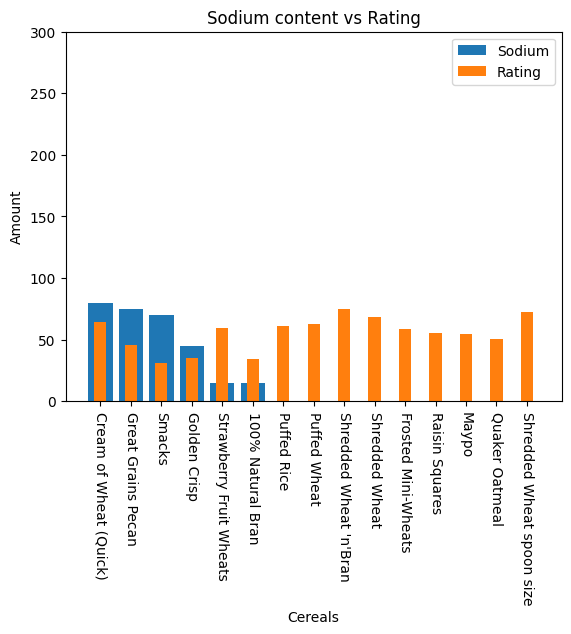

In [319]:
x = sodium_vs_rating['name'].iloc[62:77]
y1 = sodium_vs_rating['sodium'].iloc[62:77]
y2 = sodium_vs_rating['rating'].iloc[62:77]

plt.bar(x, y1, label="Sodium")
plt.bar(x, y2, width=0.4, label="Rating")

plt.xlabel("Cereals")
plt.ylabel("Amount")
plt.xticks(rotation=-90)
plt.yticks(np.arange(0, 350, step=50))

plt.title("Sodium content vs Rating")
plt.legend(loc="upper right" )
plt.show()

# Conclusion

Overall, I would say that Sodium content negatively affects Rating